In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")


What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed
-  Automatic Differentiation! 

Getting Started
---------------

#### Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [52]:
import torch

Construct a 5x3 matrix, uninitialized:



In [53]:
x = torch.empty(5, 3)
print(x)

tensor([[                    0.0000, -36893488147419103232.0000,
                            -0.0434],
        [                   -0.0000,         -536871043072.0000,
                             0.0000],
        [        -537749094400.0000,                     0.0000,
                 -537753288704.0000],
        [                    0.0000,                     0.0000,
                             0.0000],
        [                    0.0000,                     0.0000,
                             0.0000]])


Construct a randomly initialized matrix:



In [54]:
x = torch.rand(5, 3)
print(x)

tensor([[0.2073, 0.8341, 0.9755],
        [0.2849, 0.7047, 0.0364],
        [0.2763, 0.3540, 0.4225],
        [0.1600, 0.7767, 0.0846],
        [0.1473, 0.6171, 0.5030]])


Construct a matrix filled zeros and of dtype long:



In [55]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:



In [56]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [57]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-1.0182, -0.9368, -1.1277],
        [-0.0615, -0.1775, -1.0728],
        [-0.7097, -0.5652,  0.6762],
        [-0.6408, -1.6329,  0.5417],
        [ 1.2161,  0.3296, -0.2831]])


Get its size:



In [58]:
print(x.size())

torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` is in fact a tuple, so it supports all tuple operations.</p></div>

#### Operations

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1



In [59]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-0.5622, -0.2183, -0.3741],
        [ 0.3867,  0.0650, -0.1987],
        [ 0.0500,  0.0041,  0.7646],
        [-0.1069, -1.4845,  1.0342],
        [ 1.6213,  1.0053, -0.1239]])


Addition: syntax 2



In [60]:
print(torch.add(x, y))

tensor([[-0.5622, -0.2183, -0.3741],
        [ 0.3867,  0.0650, -0.1987],
        [ 0.0500,  0.0041,  0.7646],
        [-0.1069, -1.4845,  1.0342],
        [ 1.6213,  1.0053, -0.1239]])


Addition: providing an output tensor as argument



In [12]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-1.6747, -0.8947,  0.7307],
        [ 0.4895, -0.2022,  2.2190],
        [ 0.9566, -0.5398, -0.7915],
        [ 2.1248, -1.6050, -0.4494],
        [ 0.5429,  2.0196,  1.5676]])


Addition: in-place



In [61]:
# adds x to y
y.add_(x)
print(y)

tensor([[-0.5622, -0.2183, -0.3741],
        [ 0.3867,  0.0650, -0.1987],
        [ 0.0500,  0.0041,  0.7646],
        [-0.1069, -1.4845,  1.0342],
        [ 1.6213,  1.0053, -0.1239]])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!



In [62]:
print(x[:, 1])

tensor([-0.9368, -0.1775, -0.5652, -1.6329,  0.3296])


Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [63]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [16]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.1676])
0.16759651899337769


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  `here <http://pytorch.org/docs/torch>`_.

NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

Converting a Torch Tensor to a NumPy Array




In [64]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [65]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value.



In [66]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Converting NumPy Array to Torch Tensor

See how changing the np array changed the Torch Tensor automatically



In [20]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [21]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

Hopefully, the basics kind of make sense! 

### Basic autograd example

In [68]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

**NOTE** the requires_grad flag. By default, this flag is set to False. If you want to do any differntiation (which we usually do), you have to set this flag to true!

In [69]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

In [70]:
# Compute gradients.
y.backward()

In [71]:
# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad) # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


### Another autograd example

In [73]:
import torch.nn as nn #neural network module
from torch import optim #optimization module 
import torchvision
import torchvision.transforms as transforms

In [74]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.2743, -0.0814, -0.4749],
        [-0.2317, -0.2415,  0.3400]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.0570, -0.3021], requires_grad=True)


In [75]:
criterion = nn.MSELoss() #loss
optimizer = optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)

print("loss after 1 pass: ", loss.item())

loss:  1.8021619319915771
dL/dw:  tensor([[ 0.3395, -0.3208, -0.9197],
        [-0.8354,  0.3261,  0.4389]])
dL/db:  tensor([-0.2025, -0.6804])
loss after 1 pass:  1.7767481803894043


Defining a custom dataset! this is a simple example but pytorch's infrastructure for custom datasets is extremely powerful. 

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
shuffle=True)

Loading a pre-trained model. 

In [33]:
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size()) # (64, 100)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/harshilkamdar/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:06<00:00, 7747737.71it/s]


torch.Size([64, 100])


In [34]:
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

Let's put it all together for an example of 

# LINEAR REGRESSION

Epoch [5/60], Loss: 0.7401
Epoch [10/60], Loss: 0.4512
Epoch [15/60], Loss: 0.3340
Epoch [20/60], Loss: 0.2864
Epoch [25/60], Loss: 0.2670
Epoch [30/60], Loss: 0.2590
Epoch [35/60], Loss: 0.2556
Epoch [40/60], Loss: 0.2541
Epoch [45/60], Loss: 0.2534
Epoch [50/60], Loss: 0.2530
Epoch [55/60], Loss: 0.2527
Epoch [60/60], Loss: 0.2524


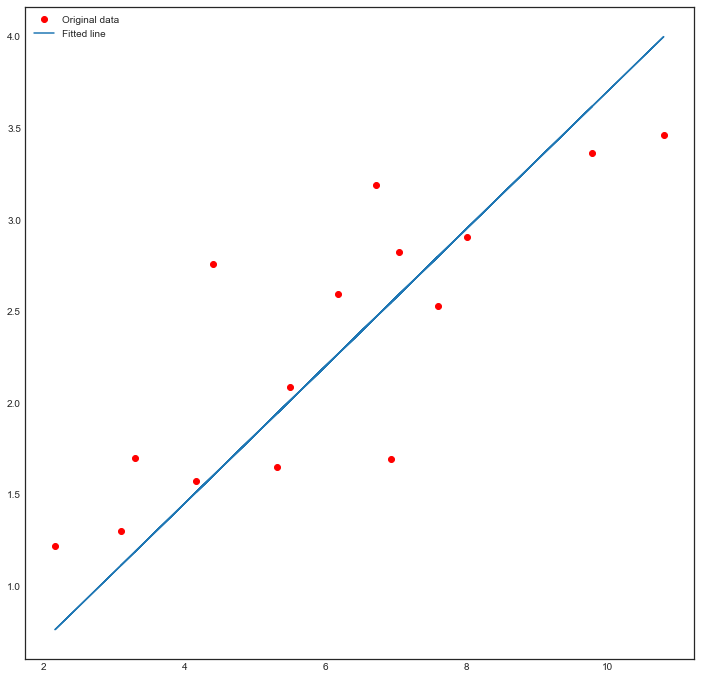

In [76]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
fig = plt.figure(figsize=(12,12))
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Let's build a v simple neural network!

In [82]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data/', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data/', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [83]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [84]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [85]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  

In [86]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.5134
Epoch [1/5], Step [200/600], Loss: 0.2569
Epoch [1/5], Step [300/600], Loss: 0.3941
Epoch [1/5], Step [400/600], Loss: 0.0982
Epoch [1/5], Step [500/600], Loss: 0.1544
Epoch [1/5], Step [600/600], Loss: 0.1251
Epoch [2/5], Step [100/600], Loss: 0.1723
Epoch [2/5], Step [200/600], Loss: 0.0840
Epoch [2/5], Step [300/600], Loss: 0.1020
Epoch [2/5], Step [400/600], Loss: 0.1115
Epoch [2/5], Step [500/600], Loss: 0.1584
Epoch [2/5], Step [600/600], Loss: 0.1350
Epoch [3/5], Step [100/600], Loss: 0.0939
Epoch [3/5], Step [200/600], Loss: 0.0858
Epoch [3/5], Step [300/600], Loss: 0.1173
Epoch [3/5], Step [400/600], Loss: 0.0652
Epoch [3/5], Step [500/600], Loss: 0.1004
Epoch [3/5], Step [600/600], Loss: 0.0271
Epoch [4/5], Step [100/600], Loss: 0.0161
Epoch [4/5], Step [200/600], Loss: 0.0295
Epoch [4/5], Step [300/600], Loss: 0.1186
Epoch [4/5], Step [400/600], Loss: 0.0454
Epoch [4/5], Step [500/600], Loss: 0.1586
Epoch [4/5], Step [600/600], Loss:

In [87]:
with torch.no_grad(): #we don't need to compute gradients. helps with memory efficiency
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 97.68 %


In [89]:
images.shape

torch.Size([100, 784])

In [ ]:
# save model
# torch.save(model.state_dict(), 'model.ckpt')